In [2]:
import json
import os
from glob import glob
import numpy as np


In [3]:
import sys
sys.path.insert(0, "../web/api/app/ai")

In [4]:
from AI import *

In [5]:
raw_components_folder = '../shared_data/assets/media/components'
processed_components_folder = '../shared_data/assets/media/processed_components'

In [18]:
image_crops = ((50, -45), (None, None))
kernel_size = 10

In [19]:
background = imread('../shared_data/Webcam Green background.png')
background = background[:, :, :3] / 255
background = crop_sides(background, image_crops)

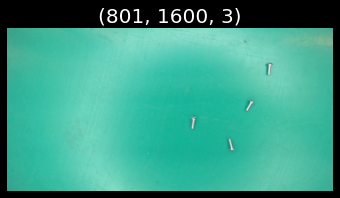

In [20]:
test_idx = 20
test_img = imread(dict_images[test_idx]['url'])
test_img = test_img[:, :, :3] / 255
test_img = crop_sides(test_img, image_crops)
print_multiple_images(test_img)

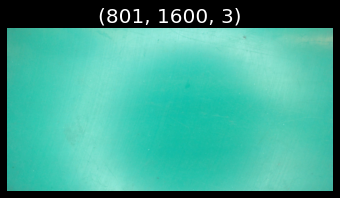

In [21]:
print_multiple_images(background)

In [9]:
def process_image(image_url, background, side_crop, kernel_size, object_limit_size):
    original_image, no_background = load_image(image_url, background, crops=side_crop)
    mask = threshold_image(no_background)
    bigger_mask = increase_mask(mask, disk(kernel_size))
    resized_segmented, labeled_segmentation, labels = segmentation(original_image, bigger_mask)
    objects_cropped, square_sizes = find_objects(original_image, labeled_segmentation, lower_limit=object_limit_size)
    final_objects, _ = square_resize_pad_3d(objects_cropped, 64)
    print(f"Biggest object {max(square_sizes)}")
    print(f"Smallest object {min(square_sizes)}")

    return objects_cropped, final_objects, square_sizes


In [10]:
images = glob(os.path.join(raw_components_folder, "**/*.png"))

In [11]:
dict_images = [add_image_to_dict(img) for img in images]

In [12]:
dict_images[0]

{'id': UUID('c8e915a5-09b2-47a2-9843-5e94c099fe01'),
 'url': '../shared_data/assets/media/components\\Object 1\\1.png',
 'state': 'UNPROCESSED',
 'objects': [],
 'classification': [],
 'object_name': 'Object 1',
 'object_identifier': 'Object 1.1'}

In [13]:
object_names = set(img.split("\\")[-2] for img in images)
for obj in object_names:
    component_dir = os.path.join(processed_components_folder, obj)
    if not os.path.exists(component_dir):
        os.mkdir(component_dir)

In [53]:
i = 20

(801, 1600, 3)
Biggest object 23187
Smallest object 14208


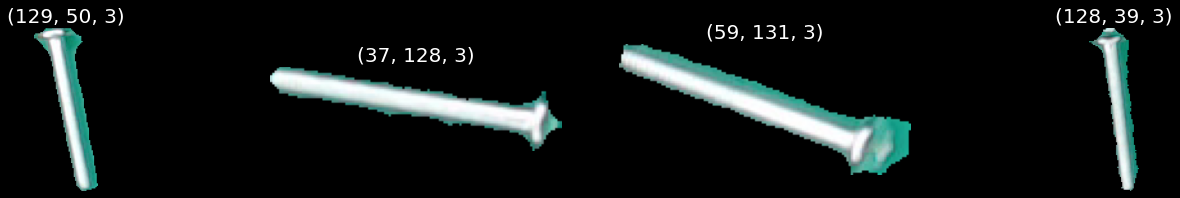

In [66]:
i += 1
objects, squares, sizes = process_image(dict_images[i]['url'], background, image_crops, kernel_size, 3000)
print_multiple_images(*objects)

In [67]:
wrong_images = []
for i in range(len(dict_images)):
    if dict_images[i]['state'] != "PROCESSED":
        try:
            objects, squares, sizes = process_image(dict_images[i]['url'], background, image_crops, kernel_size, 8000)
            for x, img in enumerate(squares):
                component_dir = os.path.join(processed_components_folder, dict_images[i]['object_name'])
                img_loc = os.path.join(component_dir, f"{dict_images[i]['object_identifier']}.{x}")
                np.save(f"{img_loc}.npy", img)
                plt.imsave(f"{img_loc}.png", img)
                dict_images[i]['state'] = "PROCESSED"
                print("Image saved")
        except:
            print("Something went wrong with image " + str(i))
            wrong_images.append(i)
    else:
        print("Skipping image, because already processed.")

(801, 1600, 3)
Biggest object 13455
Smallest object 12096
Image saved
Image saved
Image saved
Image saved
(801, 1600, 3)
Biggest object 15123
Smallest object 14076
Image saved
Image saved
Image saved
Image saved
(801, 1600, 3)
Biggest object 14076
Smallest object 13668
Image saved
Image saved
Image saved
Image saved
(801, 1600, 3)
Biggest object 13464
Smallest object 12672
Image saved
Image saved
Image saved
Image saved
(801, 1600, 3)
Biggest object 14874
Smallest object 13467
Image saved
Image saved
Image saved
Image saved
(801, 1600, 3)
Biggest object 13668
Smallest object 13266
Image saved
Image saved
Image saved
Image saved
(801, 1600, 3)
Biggest object 13872
Smallest object 13266
Image saved
Image saved
Image saved
Image saved
(801, 1600, 3)
Biggest object 14280
Smallest object 13668
Image saved
Image saved
Image saved
Image saved
(801, 1600, 3)
Biggest object 13266
Smallest object 12672
Image saved
Image saved
Image saved
Image saved
(801, 1600, 3)
Biggest object 12672
Smallest o

In [12]:
objects, squares, sizes = process_image(dict_images[0]['url'], background, image_crops, kernel_size, 10000)

(851, 1600, 3)
Biggest object 13455
Smallest object 12096


In [31]:
for i, img in enumerate(squares):
    component_dir = os.path.join(processed_components_folder, dict_images[0]['object_name'])
    if not os.path.exists(component_dir):
        os.mkdir(component_dir)
    np.save(os.path.join(component_dir, f"{dict_images[0]['object_identifier']}.{i}.npy"), img)
    print("Image saved")

Image saved
Image saved
Image saved
Image saved


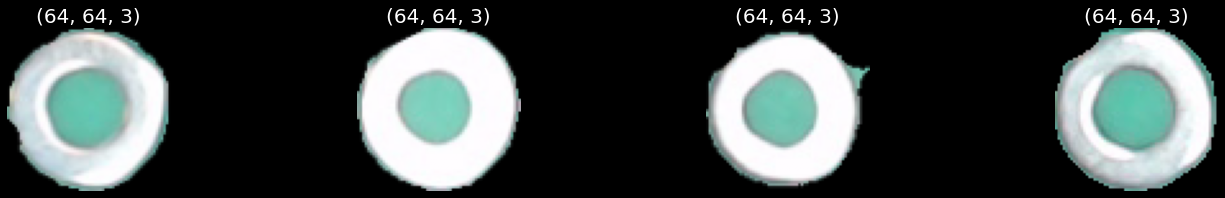

In [14]:
print_multiple_images(*squares)